# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [148]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sbn
sbn.set(style="darkgrid")
import matplotlib.mlab as mat
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from collections import Counter

In [246]:
#load data
#take necessary columns from identity table of train data
df_train_id = pd.read_csv("C:/Users/sneha/Downloads/Homeworks/DSF/train_identity.csv")
df_train_idsel = df_train_id[['TransactionID','DeviceType','DeviceInfo']]
df_train_idsel.head()

#take necessary columns from transaction table of train data
df_train_trans = pd.read_csv("C:/Users/sneha/Downloads/Homeworks/DSF/train_transaction.csv") 
df_train_transsel = df_train_trans[['TransactionID','isFraud','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain',
'addr1','addr2','dist1','dist2']]
df_train_transsel.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2
0,2987000,0,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN
1,2987001,0,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN
2,2987002,0,86469,59.0,W,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN
3,2987003,0,86499,50.0,W,mastercard,debit,yahoo.com,NaN,476.0,87.0,NaN,NaN
4,2987004,0,86506,50.0,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN


In [247]:
#Outer join on both transaction and identity tables of train data
df_c = pd.merge(df_train_idsel, df_train_transsel, on='TransactionID', how='outer')
df_c.head()

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2
0,2987004,mobile,SAMSUNG SM-G892A Build/NRD90M,0,86506,50.000,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN
1,2987008,mobile,iOS Device,0,86535,15.000,H,visa,debit,anonymous.com,NaN,337.0,87.0,NaN,NaN
2,2987010,desktop,Windows,0,86549,75.887,C,mastercard,credit,gmail.com,gmail.com,NaN,NaN,NaN,NaN
3,2987011,desktop,NaN,0,86555,16.495,C,mastercard,debit,hotmail.com,hotmail.com,NaN,NaN,NaN,30.0
4,2987016,desktop,MacOS,0,86620,30.000,H,visa,debit,aol.com,NaN,170.0,87.0,NaN,NaN


## Part 1 - Fraudulent vs Non-Fraudulent Transaction

DEVICE TYPE distribution for fraudulent and non fraudulent transactions.

In [248]:
# TODO: code and runtime results
# We filter out the fraudulent and non fraudulent transactions.
df_fraud = df_c[df_c['isFraud']==1]
df_nfraud = df_c[df_c['isFraud']==0]


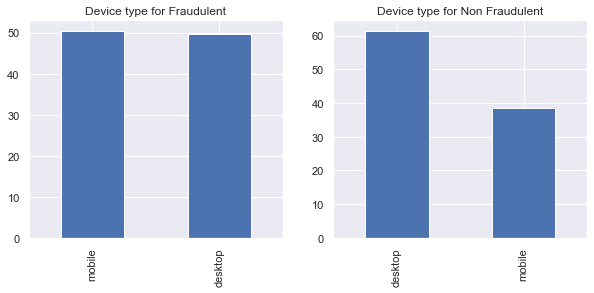

In [462]:
#We plot the percentage of each device type for fraudulent and non fraudulent transactions.
fg, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
title = ['Device type for Fraudulent' , 'Device type for Non Fraudulent']
data = [df_fraud['DeviceType'].value_counts(normalize=True) * 100, df_nfraud['DeviceType'].value_counts(normalize=True) * 100]
for i in range(0,len(data)):
    data[i].plot(kind='bar', ax=ax[i])
    ax[i].title.set_text(title[i])


We can observe that fraudulent transactions have almost the same percentage of mobile and desktop devices, 
while non fraudulent ones mostly used desktop devices.

Percentage distribution of fraudulent and non fraudulent transactions for each card type in card4.

In [360]:
#CARD4 - We find out the percentage of fraudulent transactions of each card type.
card4Tab = pd.crosstab(index=df_c["card4"],columns=df_c["isFraud"], normalize='index')
card4Tab = card4Tab*100
print(card4Tab)

isFraud                   0         1
card4                                
american express  97.130163  2.869837
discover          92.271839  7.728161
mastercard        96.566905  3.433095
visa              96.524390  3.475610


Text(0.5, 1.0, '% Fraudulent/Non Fraudulent Vs Card4 type')

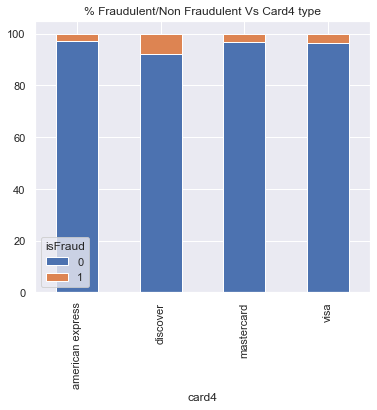

In [467]:
#Plotting the percentages of fraudulent and non fraudulent transactions of each card type. 
plot = card4Tab.plot(kind="bar",figsize=(6,5),stacked=True)
plot.set_title('% Fraudulent/Non Fraudulent Vs Card4 type')

We observe that discover card has the highest percentage of fraudulent transactions, at almost 8%, 
while American Express has the least percentage of fraudulent transactions.

Percentage distribution of fraudulent and non fraudulent transactions for each card type in card6.

In [253]:
#CARD6 - We find out the percentage of fraudulent transactions of each card type in card6.
card6Tab = pd.crosstab(index=df_c["card6"],columns=df_c["isFraud"], normalize='index')
card6Tab = card6Tab*100
print(card6Tab)

isFraud                   0         1
card6                                
charge card      100.000000  0.000000
credit            93.321520  6.678480
debit             97.573749  2.426251
debit or credit  100.000000  0.000000


Text(0.5, 1.0, '% Fraudulent/Non Fraudulent Vs Card6 type')

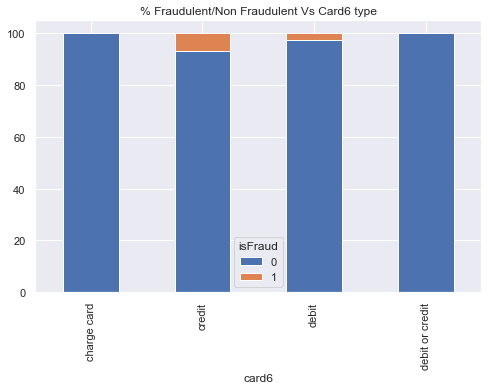

In [468]:
#Plotting the percentages of fraudulent and non fraudulent transactions of each card6 type. 

card6plot = card6Tab.plot(kind="bar",figsize=(8,5),stacked=True)
card6plot.set_title('% Fraudulent/Non Fraudulent Vs Card6 type')

We observe that credit cards have the highest percentage of fraudulent transactions, followed by debit. 
Interestingly, charged card had no fraudulent transactions.

Percentage distribution of fraudulent and non fraudulent transactions for each product code.

In [255]:
#ProductCD We find out the percentage of fraudulent transactions of each PRODUCT CODE.
ProductCDTab = pd.crosstab(index=df_c["ProductCD"],columns=df_c["isFraud"], normalize='index')
ProductCDTab = ProductCDTab*100
print(ProductCDTab)

isFraud            0          1
ProductCD                      
C          88.312731  11.687269
H          95.233769   4.766231
R          96.217406   3.782594
S          94.100447   5.899553
W          97.960061   2.039939


Text(0.5, 1.0, '% Fraudulent/Non Fraudulent Vs product code')

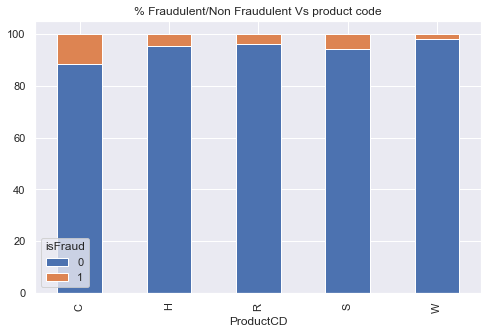

In [469]:
productplot = ProductCDTab.plot(kind="bar",figsize=(8,5),stacked=True)
productplot.set_title('% Fraudulent/Non Fraudulent Vs product code')

Product code C has the highest, i.e, 11.7% fraudulent transactions and Product code W has the least fraudulent transactions.

Percentage distribution of fraudulent and non fraudulent transactions for each purchaser email domain.

In [257]:
#The P_emaildomain feature has a lot of unique values. So, we take the email domains whose count is less than 5% of the total rows and name them 'P_EmaildomainOther'

df_c.P_emaildomain[df_c.P_emaildomain.replace(Counter(df_c.P_emaildomain)) < len(df_c.P_emaildomain)*0.05] = 'P_emaildomainOther'

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [258]:
#P_emaildomain - We find out the percentage of fraudulent transactions of each Purchaser email domain.
P_emaildomainTab = pd.crosstab(index=df_c["P_emaildomain"],columns=df_c["isFraud"], normalize='index')
P_emaildomainTab = P_emaildomainTab*100
print(P_emaildomainTab)

isFraud                     0         1
P_emaildomain                          
P_emaildomainOther  97.187363  2.812637
anonymous.com       97.678253  2.321747
gmail.com           95.645815  4.354185
hotmail.com         94.704972  5.295028
yahoo.com           97.724255  2.275745


Text(0.5, 1.0, '% Fraudulent/Non Fraudulent Vs  P email domain')

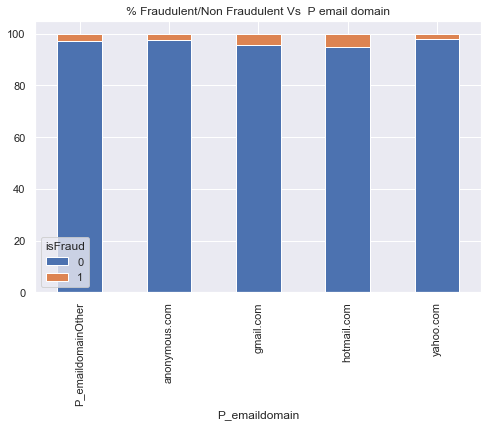

In [470]:
pplot = P_emaildomainTab.plot(kind="bar",figsize=(8,5),stacked=True)
pplot.set_title('% Fraudulent/Non Fraudulent Vs  P email domain')

Hotmail has the highest percentage of fraudulent transactions, at 5.3%. 

In [259]:
#The R_emaildomain feature has a lot of unique values. So, we take the email domains whose count is less than 1% of the total rows and name them 'R_EmaildomainOther'

df_c.R_emaildomain[df_c.R_emaildomain.replace(Counter(df_c.R_emaildomain)) < len(df_c.R_emaildomain)*0.01] = 'R_emaildomainOther'

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [260]:
#R_emaildomain - We find out the percentage of fraudulent transactions of each Receiver email domain.
R_emaildomainTab = pd.crosstab(index=df_c["R_emaildomain"],columns=df_c["isFraud"], normalize='index')
R_emaildomainTab = R_emaildomainTab*100
print(R_emaildomainTab)

isFraud                     0          1
R_emaildomain                           
R_emaildomainOther  94.729570   5.270430
anonymous.com       97.087048   2.912952
gmail.com           88.081614  11.918386
hotmail.com         92.220728   7.779272
yahoo.com           94.848843   5.151157


Text(0.5, 1.0, '% Fraudulent/Non Fraudulent Vs  R email domain')

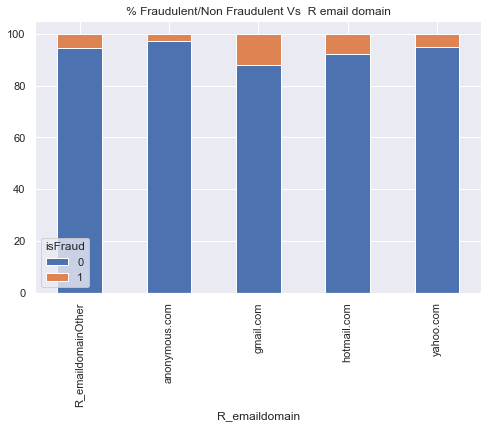

In [472]:
rplot = R_emaildomainTab.plot(kind="bar",figsize=(8,5),stacked=True)
rplot.set_title('% Fraudulent/Non Fraudulent Vs  R email domain')

The percentage of fraudulent transactions are more with gmail.com as receiver address.

In [262]:
#In the DeviceInfo column, we take the devices whose count is less than 1% of the total rows and name them 'DeviceInfoOther'

df_c.DeviceInfo[df_c.DeviceInfo.replace(Counter(df_c.DeviceInfo)) < len(df_c.DeviceInfo)*0.01] = 'DeviceInfoOther'

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
#DeviceInfo - We find out the percentage of fraudulent transactions of each major device info.
DeviceInfoTab = pd.crosstab(index=df_c["DeviceInfo"],columns=df_c["isFraud"], normalize='index')
DeviceInfoTab = DeviceInfoTab*100
print(DeviceInfoTab)

isFraud                  0          1
DeviceInfo                           
DeviceInfoOther  87.569424  12.430576
MacOS            97.788913   2.211087
Trident/7.0      98.709677   1.290323
Windows          93.460039   6.539961
iOS Device       93.731675   6.268325


Text(0.5, 1.0, '% Fraudulent/Non Fraudulent Vs  Device Info')

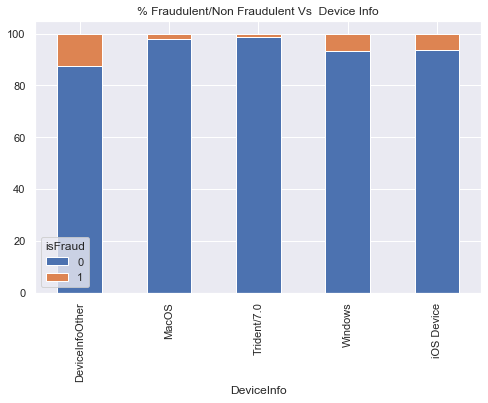

In [473]:
deviceInfoplot = DeviceInfoTab.plot(kind="bar",figsize=(8,5),stacked=True)
deviceInfoplot.set_title('% Fraudulent/Non Fraudulent Vs  Device Info')

Windows and IOS devices as a single device info have the highest percentage of fraudulent transactions 
at 6.5 and 6.3% respectively.

Distribution of transaction amount over fraudulent transactions.

Text(0.5, 1.0, 'TransactionAmt Vs Frequency of Fraudulent transactions')

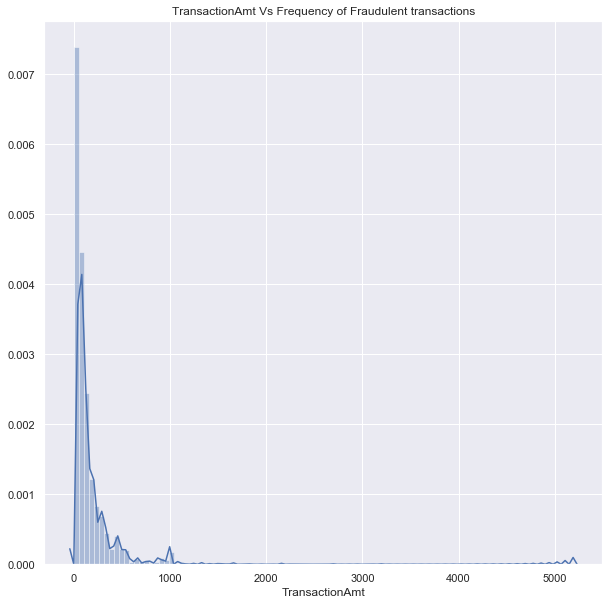

In [474]:
plt.figure(figsize=(10,10))
#sbn.distplot(df_nfraud['TransactionAmt'],bins=100)
Tamtplot = sbn.distplot(df_fraud['TransactionAmt'],bins=100)
Tamtplot.set_title('TransactionAmt Vs Frequency of Fraudulent transactions')

Most fraudulent transactions happen over smaller amounts, mostly between 0 to 300. There is again a small spike above 5000.

In [230]:
df_nfraud['TransactionAmt'].describe()

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

Percentage distribution of fraudulent transactions with TransactionDT

We initially perform preprocessing on the TransactionDT column. 

In [457]:
#The column seems to denote time delta in seconds. So, we add a column denoting the time delta in number of days.
totalDays = (df_c['TransactionDT'].max()-df_c['TransactionDT'].min())/86400
#totalDays = 181.9 days
#Marking day numbers for the transactions
df_c['TransactionDTDayNumber'] = df_c['TransactionDT'].apply(lambda x: x/86400).astype(int)
df_c.head()

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,...,addr1,addr2,dist1,dist2,TransactionDTDayNumber,TransactionDTDate,timeDelta,DayOfTheWeek,hourOfDay,month
0,2987004,mobile,DeviceInfoOther,0,86506,50.000,H,mastercard,credit,gmail.com,...,420.0,87.0,NaN,NaN,1,2017-12-02 00:01:46,-8.0,Saturday,0,12
1,2987008,mobile,iOS Device,0,86535,15.000,H,visa,debit,anonymous.com,...,337.0,87.0,NaN,NaN,1,2017-12-02 00:02:15,-5.0,Saturday,0,12
2,2987010,desktop,Windows,0,86549,75.887,C,mastercard,credit,gmail.com,...,NaN,NaN,NaN,NaN,1,2017-12-02 00:02:29,0.0,Saturday,0,12
3,2987011,desktop,NaN,0,86555,16.495,C,mastercard,debit,hotmail.com,...,NaN,NaN,NaN,30.0,1,2017-12-02 00:02:35,0.0,Saturday,0,12
4,2987016,desktop,MacOS,0,86620,30.000,H,visa,debit,P_emaildomainOther,...,170.0,87.0,NaN,NaN,1,2017-12-02 00:03:40,-5.0,Saturday,0,12


Text(0.5, 1.0, 'Frequency of Transactions VS TransactionDate')

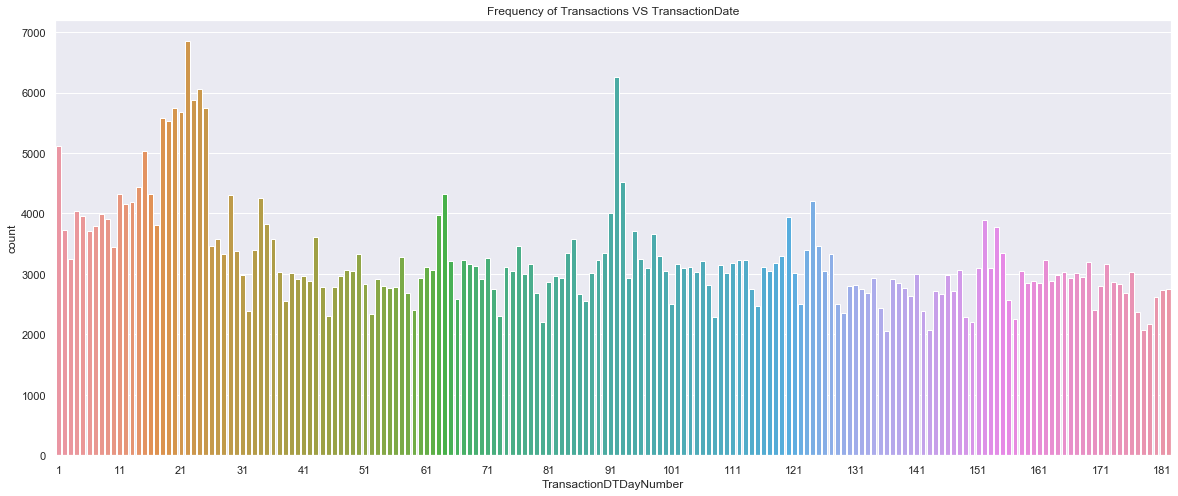

In [477]:
plt.figure(figsize=(20,8))
daynumVStransaction = sbn.countplot(x="TransactionDTDayNumber", data=df_c)
for idx, label in enumerate(daynumVStransaction.get_xticklabels()):
    if idx % 10 == 0:  # every 10th label is retained.
        label.set_visible(True)
    else:
        label.set_visible(False)
daynumVStransaction.set_title('Frequency of Transactions VS TransactionDate')

There is a sudden spike in transactions on the 25th day. From the visualisation in cell _ below, there is a spike on 
day 390 in the test data as well. There is a gap of 31 days between the train and test data. This means, the test data starts
one month after train data ends. Also, 390-25 = 365, which means they're exactly one year apart. Assuming these 2 days are 
Christmas,we fit this assumption and the start date comes to be December 1. I researched on kaggle to find similar assumptions and found one, where the year was taken as 2017. Referred from: https://kaggle.com/c/ieee-fraud-detection/discussion/100071#latest-604196

Plot of count of fraudulent transactions vs Transaction day number.

Text(0.5, 1.0, 'Frequency of Fraudulent Transactions VS TransactionDate')

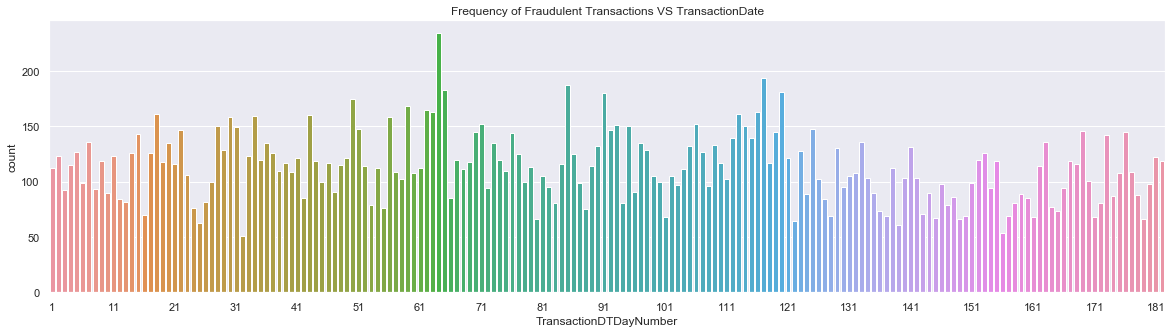

In [478]:
plt.figure(figsize=(20,5))
daynumVStransactionFraud = sbn.countplot(x="TransactionDTDayNumber", data=df_c[df_c['isFraud']==1])
for idx, label in enumerate(daynumVStransactionFraud.get_xticklabels()):
    if idx % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
daynumVStransactionFraud.set_title('Frequency of Fraudulent Transactions VS TransactionDate')

Text(0.5, 1.0, 'Frequency of Non Fraudulent Transactions VS TransactionDate')

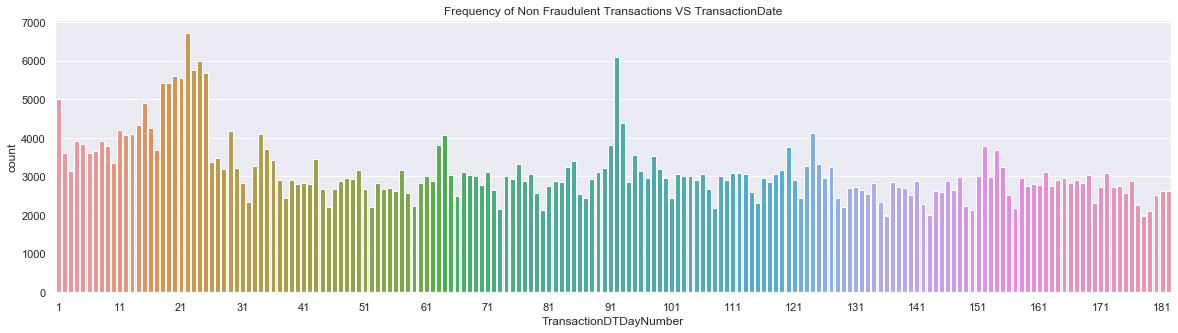

In [480]:
plt.figure(figsize=(20,5))
daynumVStransactionNFraud = sbn.countplot(x="TransactionDTDayNumber", data=df_c[df_c['isFraud']==0])
for idx, label in enumerate(daynumVStransactionNFraud.get_xticklabels()):
    if idx % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
daynumVStransactionNFraud.set_title('Frequency of Non Fraudulent Transactions VS TransactionDate')

In [268]:
#Guessing start date to be Dec 1 2017, we find the date of every transaction.
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
df_c['TransactionDTDate'] = df_c['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

print(df_c['TransactionDTDate'].head())
print(df_c['TransactionDTDate'].tail())

0   2017-12-02 00:01:46
1   2017-12-02 00:02:15
2   2017-12-02 00:02:29
3   2017-12-02 00:02:35
4   2017-12-02 00:03:40
Name: TransactionDTDate, dtype: datetime64[ns]
590535   2018-06-01 23:57:27
590536   2018-06-01 23:57:29
590537   2018-06-01 23:57:59
590538   2018-06-01 23:58:08
590539   2018-06-01 23:58:51
Name: TransactionDTDate, dtype: datetime64[ns]


## Part 2 - Transaction Frequency

From the above transaction date, we calculate the hour of day, month and day of the week. This data can be used to find 
correlations with isFraud during further analysis.

In [380]:
#Finding day of the week
df_c['DayOfTheWeek'] = df_c['TransactionDTDate'].dt.weekday_name
df_c.head()

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,...,addr1,addr2,dist1,dist2,TransactionDTDayNumber,TransactionDTDate,timeDelta,DayOfTheWeek,hourOfDay,month
0,2987004,mobile,DeviceInfoOther,0,86506,50.000,H,mastercard,credit,gmail.com,...,420.0,87.0,NaN,NaN,1,2017-12-02 00:01:46,-8.0,Saturday,0,12
1,2987008,mobile,iOS Device,0,86535,15.000,H,visa,debit,anonymous.com,...,337.0,87.0,NaN,NaN,1,2017-12-02 00:02:15,-5.0,Saturday,0,12
2,2987010,desktop,Windows,0,86549,75.887,C,mastercard,credit,gmail.com,...,NaN,NaN,NaN,NaN,1,2017-12-02 00:02:29,0.0,Saturday,0,12
3,2987011,desktop,NaN,0,86555,16.495,C,mastercard,debit,hotmail.com,...,NaN,NaN,NaN,30.0,1,2017-12-02 00:02:35,0.0,Saturday,0,12
4,2987016,desktop,MacOS,0,86620,30.000,H,visa,debit,P_emaildomainOther,...,170.0,87.0,NaN,NaN,1,2017-12-02 00:03:40,-5.0,Saturday,0,12


In [272]:
#Finding hour of day
df_c['hourOfDay'] = df_c.TransactionDTDate.dt.hour
df_c.head()
#df_cumulative.tail()

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,TransactionDTDayNumber,TransactionDTDate,timeDelta,DayOfTheWeek,hourOfDay
0,2987004,mobile,DeviceInfoOther,0,86506,50.000,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,1,2017-12-02 00:01:46,-8.0,Saturday,0
1,2987008,mobile,iOS Device,0,86535,15.000,H,visa,debit,anonymous.com,NaN,337.0,87.0,NaN,NaN,1,2017-12-02 00:02:15,-5.0,Saturday,0
2,2987010,desktop,Windows,0,86549,75.887,C,mastercard,credit,gmail.com,gmail.com,NaN,NaN,NaN,NaN,1,2017-12-02 00:02:29,0.0,Saturday,0
3,2987011,desktop,NaN,0,86555,16.495,C,mastercard,debit,hotmail.com,hotmail.com,NaN,NaN,NaN,30.0,1,2017-12-02 00:02:35,0.0,Saturday,0
4,2987016,desktop,MacOS,0,86620,30.000,H,visa,debit,P_emaildomainOther,NaN,170.0,87.0,NaN,NaN,1,2017-12-02 00:03:40,-5.0,Saturday,0


In [273]:
#Finding month
df_c['month'] = df_c.TransactionDTDate.dt.month
df_c.head()
#df_cumulative.tail()

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,...,addr1,addr2,dist1,dist2,TransactionDTDayNumber,TransactionDTDate,timeDelta,DayOfTheWeek,hourOfDay,month
0,2987004,mobile,DeviceInfoOther,0,86506,50.000,H,mastercard,credit,gmail.com,...,420.0,87.0,NaN,NaN,1,2017-12-02 00:01:46,-8.0,Saturday,0,12
1,2987008,mobile,iOS Device,0,86535,15.000,H,visa,debit,anonymous.com,...,337.0,87.0,NaN,NaN,1,2017-12-02 00:02:15,-5.0,Saturday,0,12
2,2987010,desktop,Windows,0,86549,75.887,C,mastercard,credit,gmail.com,...,NaN,NaN,NaN,NaN,1,2017-12-02 00:02:29,0.0,Saturday,0,12
3,2987011,desktop,NaN,0,86555,16.495,C,mastercard,debit,hotmail.com,...,NaN,NaN,NaN,30.0,1,2017-12-02 00:02:35,0.0,Saturday,0,12
4,2987016,desktop,MacOS,0,86620,30.000,H,visa,debit,P_emaildomainOther,...,170.0,87.0,NaN,NaN,1,2017-12-02 00:03:40,-5.0,Saturday,0,12


In [459]:
#We find the most frequent country code. Turns out its 87.
df_cumulative['addr2'].value_counts()

87.0        956415
unkaddr2    131315
60.0          7125
96.0          1246
32.0           152
65.0           131
31.0            83
16.0            77
19.0            56
69.0            44
27.0            34
26.0            32
43.0            30
57.0            29
34.0            27
98.0            26
73.0            26
102.0           21
59.0            19
54.0            16
29.0            14
68.0            13
17.0            11
10.0            11
72.0            10
71.0            10
79.0             9
78.0             9
88.0             9
36.0             9
             ...  
97.0             2
76.0             2
77.0             2
81.0             2
92.0             2
90.0             2
63.0             2
91.0             1
64.0             1
11.0             1
58.0             1
50.0             1
14.0             1
15.0             1
49.0             1
75.0             1
85.0             1
99.0             1
22.0             1
33.0             1
80.0             1
25.0        

Text(0.5, 1.0, 'Hour of Day VS Frequency of transactions')

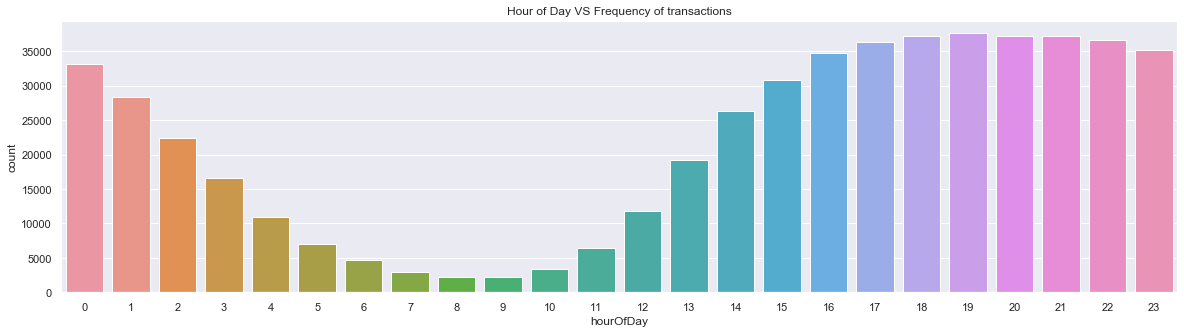

In [481]:
plt.figure(figsize=(20,5))
hourofdayVStransactionfrequency = sbn.countplot(x="hourOfDay", data=df_c[df_c['addr2']==87])
hourofdayVStransactionfrequency.set_title('Hour of Day VS Frequency of transactions')

In the graph, between hour 6 and hour 10, the transactions are the lowest. They most probably should be the sleeping hours in country 87. If we consider 8 am to 12pm to be the waking hours, we can map these timings approximately to 12 pm and 4 am in the reference time. The trend of transactions gradually increase from 12pm reference, as during the day, stay consistent for a period of time(which is presumably the evening) and reduce as the night hours increase. This also supports our observation. So, the country with code 87 is roughly 4 hours behind the reference time.

## Part 3 - Product Code

To understand the distribution of transaction amount with product codes, we plot a boxplot first.

<Figure size 2160x360 with 0 Axes>

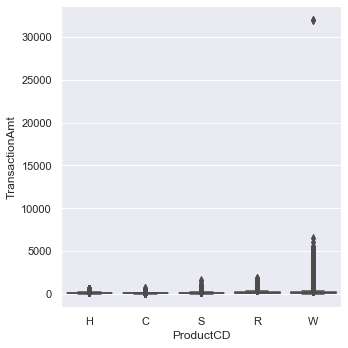

In [275]:
# TODO: code to analyze prices for different product codes
plt.figure(figsize=(30,5))
productcodeVStransAmt = sbn.catplot(x='ProductCD',y='TransactionAmt',kind='box', data=df_c)
productcodeVStransAmt 

Product code W seems to have outliers, so we check the number of records with abnormally high transaction amount.

In [276]:
#Only 2 rows with transaction amount > 10000, both correspond to product code W.
df_c[df_c['TransactionAmt']>10000]

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,...,addr1,addr2,dist1,dist2,TransactionDTDayNumber,TransactionDTDate,timeDelta,DayOfTheWeek,hourOfDay,month
334577,3261336,NaN,NaN,0,6652360,31937.391,W,mastercard,credit,yahoo.com,...,205.0,87.0,27.0,NaN,76,2018-02-15 23:52:40,0.0,Thursday,23,2
334579,3261339,NaN,NaN,0,6652391,31937.391,W,mastercard,credit,yahoo.com,...,205.0,87.0,27.0,NaN,76,2018-02-15 23:53:11,0.0,Thursday,23,2


<Figure size 2160x1080 with 0 Axes>

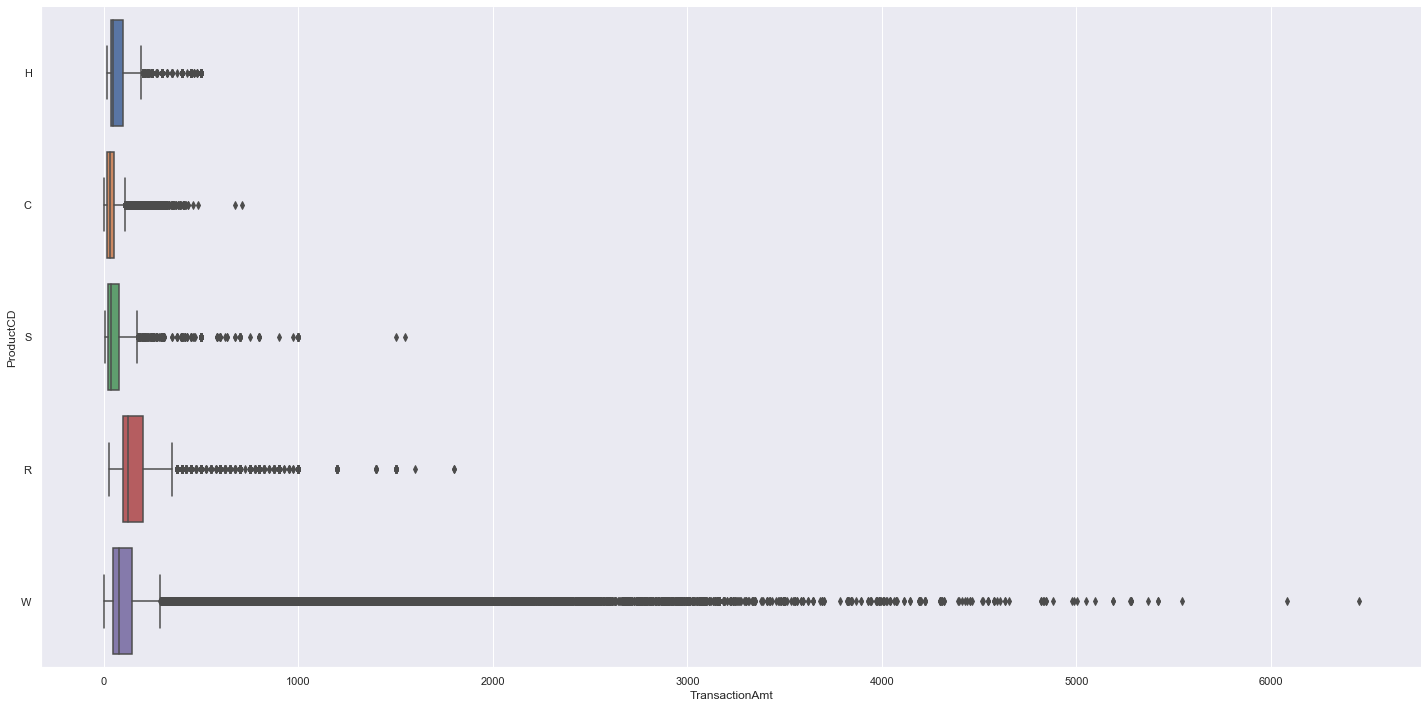

In [483]:
#We visualise the data distributions of transaction amounts < 10000.
df_c_below10k = df_c[df_c['TransactionAmt']<10000]
plt.figure(figsize=(30,15))
productcodeVStransAmt10k = sbn.catplot(x='TransactionAmt',y='ProductCD',kind='box', data=df_c_below10k, height=10, aspect=2)
productcodeVStransAmt10k

Product code W has a lot of high amount transactions, but the 25th, 50th, 75th percentile of R product code are higher 
than that of W. We now examine the mean transaction amount of each product code.

In [131]:
print("W - ",df_c[df_c['ProductCD']=='W']['TransactionAmt'].mean())
print("H - ",df_c[df_c['ProductCD']=='H']['TransactionAmt'].mean())
print("C - ",df_c[df_c['ProductCD']=='C']['TransactionAmt'].mean())
print("S - ",df_c[df_c['ProductCD']=='S']['TransactionAmt'].mean())
print("R - ",df_c[df_c['ProductCD']=='R']['TransactionAmt'].mean())


#Max is R and min is C

W -  153.15855385223293
H -  73.17005813953489
C -  42.87235311373386
S -  60.269487444100434
R -  168.30618849306347


R is the product code that refers to the most expensive products and C refers to the least expensive products.

## Part 4 - Correlation Coefficient

We now plot the bar graph between the time of day (hour of day in this case) and avg transaction amount.

In [218]:
df_c['hourOfDay'].value_counts()

19    42115
20    41782
21    41641
18    41639
22    41139
17    40723
23    39949
16    38698
0     37795
15    33859
1     32797
14    28328
2     26732
3     20802
13    20315
4     14839
12    12451
5      9701
11     6827
6      6007
7      3704
10     3627
8      2591
9      2479
Name: hourOfDay, dtype: int64

Text(0.5, 1.0, 'Time of day VS transaction Amt')

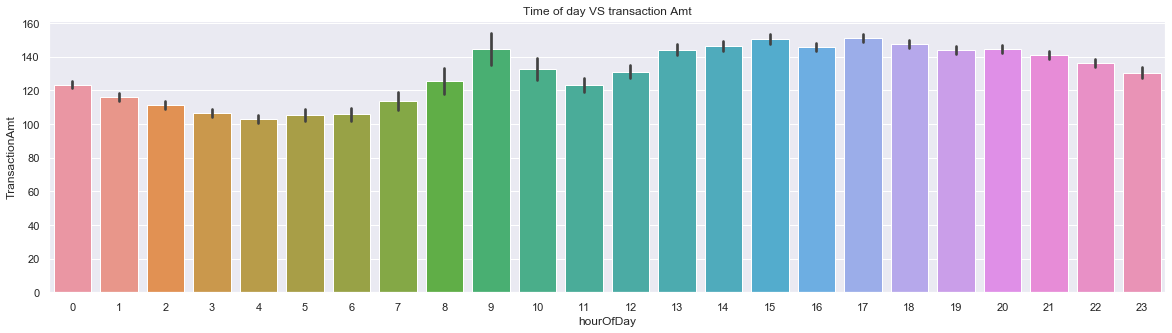

In [484]:
# TODO: code to calculate correlation coefficient
# Plot purchase amount mean VS hour of day
plt.figure(figsize=(20,5))
Plot_purchaseAmtVShourOfDay = sbn.barplot(x="hourOfDay", y="TransactionAmt", data=df_c)
Plot_purchaseAmtVShourOfDay.set_title('Time of day VS transaction Amt')

In [220]:
# Calculatine correlation coefficient between hour of day and transaction amount.
df_c['hourOfDay'].corr(df_c['TransactionAmt'])

0.0445323560306529

In [490]:
df_c.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2,TransactionDTDayNumber,timeDelta,hourOfDay,month
TransactionID,1.000000,0.014166,0.998280,0.012025,-0.000370,0.057213,-0.027043,-0.026273,0.998267,0.184272,0.011143,-0.480064
isFraud,0.014166,1.000000,0.013103,0.011320,0.005596,-0.030387,0.021522,-0.019054,0.013182,-0.013445,-0.013112,-0.030548
TransactionDT,0.998280,0.013103,1.000000,0.011920,-0.000051,0.051972,-0.027295,-0.026860,0.999982,0.177724,0.011873,-0.442921
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.007421,0.028312,0.026146,0.023143,0.011656,0.034764,0.044532,-0.013892
addr1,-0.000370,0.005596,-0.000051,-0.007421,1.000000,-0.002765,-0.001212,0.004686,-0.000026,-0.030774,-0.004346,0.004438
addr2,0.057213,-0.030387,0.051972,0.028312,-0.002765,1.000000,-0.038691,0.010227,0.051968,-0.032230,0.001335,-0.076707
dist1,-0.027043,0.021522,-0.027295,0.026146,-0.001212,-0.038691,1.000000,NaN,-0.027343,NaN,0.008005,-0.003960
dist2,-0.026273,-0.019054,-0.026860,0.023143,0.004686,0.010227,NaN,1.000000,-0.026911,0.001183,0.007650,-0.005746
TransactionDTDayNumber,0.998267,0.013182,0.999982,0.011656,-0.000026,0.051968,-0.027343,-0.026911,1.000000,0.177781,0.005937,-0.442949
timeDelta,0.184272,-0.013445,0.177724,0.034764,-0.030774,-0.032230,NaN,0.001183,0.177781,1.000000,-0.008147,-0.268482


The correlation is 0.045.

## Part 5 - Interesting Plot

Text(0.5, 1.0, 'Frequency of fraudulent transactions VS Transaction date')

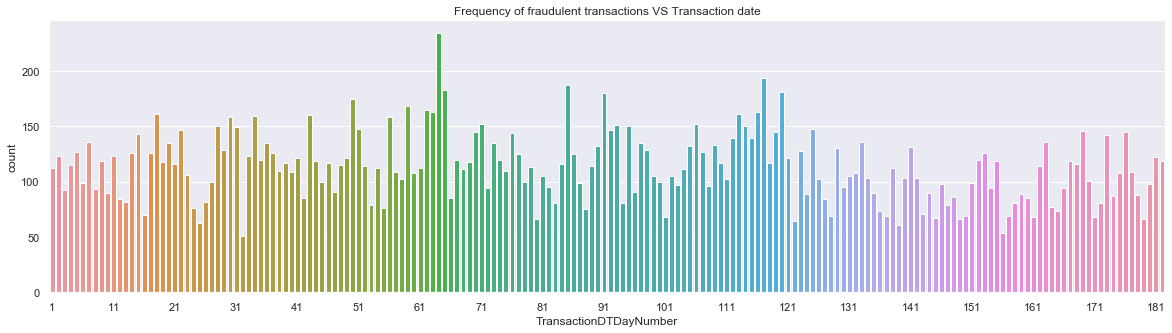

In [485]:
# TODO: code to generate the plot here.
plt.figure(figsize=(20,5))
daynumVStransactionFraud = sbn.countplot(x="TransactionDTDayNumber", data=df_c[df_c['isFraud']==1])
for idx, label in enumerate(daynumVStransactionFraud.get_xticklabels()):
    if idx % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
daynumVStransactionFraud.set_title('Frequency of fraudulent transactions VS Transaction date')

The fraudulent transactions take a sudden noticeable spike on day 64. 64 days after Dec 1 is Feb 3 2018. 
Upon researching on the internet, I found that Feb 8 2013 was the day Dow Jones Index crashed 665 points, making it the worst 
in two years. Referred from: [Link](https://theweek.com/10things/750984/10-things-need-know-today-february-3-2018). So, a large
number of fraudulent transactions(mostly of smaller value) may be done on that day in the form of selling shares in anticipation of the decline in prices.

## Part 6 - Prediction Model

For building the prediction model, we merge train and test data and perform preprocessing.

In [286]:
# TODO: code for your final model
#Outer join on both transaction and identity tables of train data
c_copy = pd.merge(df_train_idsel, df_train_transsel, on='TransactionID', how='outer')
c_copy.head()

,TransactionID,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2
0,2987004,mobile,SAMSUNG SM-G892A Build/NRD90M,0,86506,50.000,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN
1,2987008,mobile,iOS Device,0,86535,15.000,H,visa,debit,anonymous.com,NaN,337.0,87.0,NaN,NaN
2,2987010,desktop,Windows,0,86549,75.887,C,mastercard,credit,gmail.com,gmail.com,NaN,NaN,NaN,NaN
3,2987011,desktop,NaN,0,86555,16.495,C,mastercard,debit,hotmail.com,hotmail.com,NaN,NaN,NaN,30.0
4,2987016,desktop,MacOS,0,86620,30.000,H,visa,debit,aol.com,NaN,170.0,87.0,NaN,NaN


In [287]:
Xtrain = c_copy.drop(['isFraud'], axis=1)
Xtrain.shape

(590540, 14)

In [289]:
Ytrain = c_copy['isFraud']
Ytrain.shape

(590540,)

In [293]:
#Import test data
#take necessary columns from identity table of test data
df_test_id = pd.read_csv("C:/Users/sneha/Downloads/Homeworks/DSF/test_identity.csv")
df_test_idsel = df_test_id[['TransactionID','DeviceType','DeviceInfo']]
df_test_idsel.head()

,TransactionID,DeviceType,DeviceInfo
0,3663586,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,mobile,LGLS676 Build/MXB48T
2,3663597,desktop,Trident/7.0
3,3663601,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,mobile,SM-G9650 Build/R16NW


In [294]:
df_test_idsel.shape

(141907, 3)

In [295]:
#take necessary columns from transaction table of test data
df_test_trans = pd.read_csv("C:/Users/sneha/Downloads/Homeworks/DSF/test_transaction.csv") 
df_test_transsel = df_test_trans[['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain',
'addr1','addr2','dist1','dist2']]
df_test_transsel.shape

(506691, 12)

In [296]:
#Outer join on both transaction and identity tables of test data
c1 = pd.merge(df_test_idsel, df_test_transsel, on='TransactionID', how='outer')
c1.head()
c1.shape

(506691, 14)

In [460]:
#Pre processing on the TransactionDT column
df_c2 = df_c1.copy()
totalDays = (df_c2['TransactionDT'].max()-df_c2['TransactionDT'].min())/86400
#totalDays = 181.9 days
#Marking day numbers for the transactions
df_c2['TransactionDTDayNumber'] = df_c2['TransactionDT'].apply(lambda x: x/86400).astype(int)
df_c2.head()

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,TransactionDTDayNumber
0,3663586,mobile,MYA-L13 Build/HUAWEIMYA-L13,18404013,6.271,C,visa,debit,hotmail.com,hotmail.com,NaN,NaN,NaN,NaN,213
1,3663588,mobile,LGLS676 Build/MXB48T,18404055,50.000,S,american express,credit,NaN,gmail.com,494.0,87.0,NaN,37.0,213
2,3663597,desktop,Trident/7.0,18404235,37.318,C,visa,debit,anonymous.com,anonymous.com,NaN,NaN,NaN,NaN,213
3,3663601,mobile,MYA-L13 Build/HUAWEIMYA-L13,18404315,6.271,C,visa,debit,hotmail.com,hotmail.com,NaN,NaN,NaN,NaN,213
4,3663602,mobile,SM-G9650 Build/R16NW,18404359,52.258,C,visa,debit,hotmail.com,hotmail.com,NaN,NaN,NaN,NaN,213


Distribution of transactions with TransactionDate. Spike on day 390. Used this previously in the analysis to support 
the choice of dec 1 2017 as start date.

Text(0.5, 1.0, 'Frequency of transactions VS Transaction date')

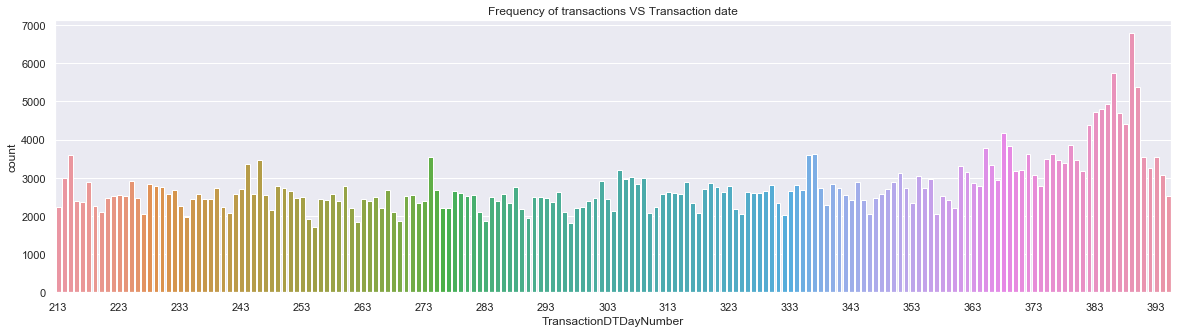

In [486]:
plt.figure(figsize=(20,5))
daynumVStransaction = sbn.countplot(x="TransactionDTDayNumber", data=df_c2)
for idx, label in enumerate(daynumVStransaction.get_xticklabels()):
    if idx % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
daynumVStransaction.set_title('Frequency of transactions VS Transaction date')

In [297]:
Xtest = c1
Xtest.shape

(506691, 14)

In [298]:
#append Xtrain and Xtest into a new dataframe called df_cumulative
df_cumulative = Xtrain.append(Xtest)
df_cumulative.shape

(1097231, 14)

Preprocessing on date column

In [300]:
# Preprocessing for date column
totalDays = (df_cumulative['TransactionDT'].max()-df_cumulative['TransactionDT'].min())/86400
totalDays

394.99936342592594

In [461]:
#Marking day numbers for the transactions
df_cumulative['TransactionDTDayNumber'] = df_cumulative['TransactionDT'].apply(lambda x: x/86400).astype(int)
df_cumulative.head()

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,TransactionDTDayNumber,TransactionDTDate,DayOfTheWeek,hourOfDay
0,2987004,mobile,DeviceInfoOther,86506,50.000,H,mastercard,credit,gmail.com,unkRemail,420,87,NaN,NaN,1,2017-12-02 00:01:46,Saturday,0
1,2987008,mobile,DeviceInfoOther,86535,15.000,H,visa,debit,anonymous.com,unkRemail,337,87,NaN,NaN,1,2017-12-02 00:02:15,Saturday,0
2,2987010,desktop,Windows,86549,75.887,C,mastercard,credit,gmail.com,gmail.com,unkaddr1,unkaddr2,NaN,NaN,1,2017-12-02 00:02:29,Saturday,0
3,2987011,desktop,unkDeviceInfo,86555,16.495,C,mastercard,debit,hotmail.com,R_emaildomainOther,unkaddr1,unkaddr2,NaN,30.0,1,2017-12-02 00:02:35,Saturday,0
4,2987016,desktop,DeviceInfoOther,86620,30.000,H,visa,debit,P_emaildomainOther,unkRemail,170,87,NaN,NaN,1,2017-12-02 00:03:40,Saturday,0


In [303]:
#Guessing start date to be Dec 1 2017, we find the date of every transaction.
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
df_cumulative['TransactionDTDate'] = df_cumulative['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

print(df_cumulative['TransactionDTDate'].head())
print(df_cumulative['TransactionDTDate'].tail())

0   2017-12-02 00:01:46
1   2017-12-02 00:02:15
2   2017-12-02 00:02:29
3   2017-12-02 00:02:35
4   2017-12-02 00:03:40
Name: TransactionDTDate, dtype: datetime64[ns]
506686   2018-12-31 23:57:41
506687   2018-12-31 23:57:49
506688   2018-12-31 23:57:59
506689   2018-12-31 23:58:46
506690   2018-12-31 23:58:57
Name: TransactionDTDate, dtype: datetime64[ns]


In [304]:
df_cumulative['DayOfTheWeek'] = df_cumulative['TransactionDTDate'].dt.weekday_name
df_cumulative.head()

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,TransactionDTDayNumber,TransactionDTDate,DayOfTheWeek
0,2987004,mobile,SAMSUNG SM-G892A Build/NRD90M,86506,50.000,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,1,2017-12-02 00:01:46,Saturday
1,2987008,mobile,iOS Device,86535,15.000,H,visa,debit,anonymous.com,NaN,337.0,87.0,NaN,NaN,1,2017-12-02 00:02:15,Saturday
2,2987010,desktop,Windows,86549,75.887,C,mastercard,credit,gmail.com,gmail.com,NaN,NaN,NaN,NaN,1,2017-12-02 00:02:29,Saturday
3,2987011,desktop,NaN,86555,16.495,C,mastercard,debit,hotmail.com,hotmail.com,NaN,NaN,NaN,30.0,1,2017-12-02 00:02:35,Saturday
4,2987016,desktop,MacOS,86620,30.000,H,visa,debit,aol.com,NaN,170.0,87.0,NaN,NaN,1,2017-12-02 00:03:40,Saturday


We change the email domains and device infos which are less than 5% of the data to 'other' type.

In [306]:
#In the P_emaildomain column, we take the email domains whose count is less than 5% of the total rows and name them 'P_EmaildomainOther'
df_cumulative.P_emaildomain[df_cumulative.P_emaildomain.replace(Counter(df_cumulative.P_emaildomain)) < len(df_cumulative.P_emaildomain)*0.05] = 'P_emaildomainOther'

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [308]:
#In the R_emaildomain column, we take the email domains whose count is less than 5% of the total rows and name them 'R_EmaildomainOther'
df_cumulative.R_emaildomain[df_cumulative.R_emaildomain.replace(Counter(df_cumulative.R_emaildomain)) < len(df_cumulative.R_emaildomain)*0.05] = 'R_emaildomainOther'

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [310]:
#In the DeviceInfo column, we take the devices whose count is less than 5% of the total rows and name them 'DeviceInfoOther'
df_cumulative.DeviceInfo[df_cumulative.DeviceInfo.replace(Counter(df_cumulative.DeviceInfo)) < len(df_cumulative.DeviceInfo)*0.05] = 'DeviceInfoOther'

C:\Users\sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [311]:
df_cumulative[df_cumulative['DeviceInfo']=="DeviceInfoOther"]['TransactionID'].count()

141013

In [312]:
#Count null values of each feature
df_cumulative.isna().sum()

TransactionID                   0
DeviceType                 819490
DeviceInfo                 863508
TransactionDT                   0
TransactionAmt                  0
ProductCD                       0
card4                        4663
card6                        4578
P_emaildomain              163648
R_emaildomain              824070
addr1                      131315
addr2                      131315
dist1                      643488
dist2                     1023168
TransactionDTDayNumber          0
TransactionDTDate               0
DayOfTheWeek                    0
dtype: int64

To fill null values of R_emaildomain, we analyse the P_emaildomain and dist1(some form of distance between the purchaser and receiver).
For entries with a non null P_emaildomain and dist1=0, we fill the null value of R_emaildomain with P_emaildomain itself, 
since the purchaser and receiver will probably have the same email address. 

In [313]:
df_cumulative[df_cumulative['dist1']==0].count()

TransactionID             39102
DeviceType                    0
DeviceInfo                    0
TransactionDT             39102
TransactionAmt            39102
ProductCD                 39102
card4                     39029
card6                     39029
P_emaildomain             29101
R_emaildomain                 0
addr1                     39093
addr2                     39093
dist1                     39102
dist2                         0
TransactionDTDayNumber    39102
TransactionDTDate         39102
DayOfTheWeek              39102
dtype: int64

In [314]:
df_cumulative[(df_cumulative['dist1']==0) & (df_cumulative['P_emaildomain'].notnull()) ].count()

TransactionID             29101
DeviceType                    0
DeviceInfo                    0
TransactionDT             29101
TransactionAmt            29101
ProductCD                 29101
card4                     29048
card6                     29048
P_emaildomain             29101
R_emaildomain                 0
addr1                     29092
addr2                     29092
dist1                     29101
dist2                         0
TransactionDTDayNumber    29101
TransactionDTDate         29101
DayOfTheWeek              29101
dtype: int64

In [315]:
# We replace the R_emaildomain with the P_emaildomain for entries with dist1 = 0.
#Since we assume dist1 is some form of distance between purcjaser and receiver.
df_cumulative['R_emaildomain'] = np.where((df_cumulative['dist1']==0) & (df_cumulative['P_emaildomain'].notnull()) , df_cumulative['P_emaildomain'],df_cumulative['R_emaildomain'])

Filling the null values. We can replace missing categorical values to 'unknown' type, mainly because in transaction data, 
null value may be hiding or masking something. So, we can find the correlation with the unknown type for any interesting observations.

In [316]:
#replacing missing device type values to unkdevicetype
df_cumulative.DeviceType.fillna('unkDeviceType',inplace=True)
df_cumulative.DeviceType.value_counts()

unkDeviceType    819490
desktop          159568
mobile           118173
Name: DeviceType, dtype: int64

In [317]:
#replacing missing device info values to unkdeviceinfo
df_cumulative.DeviceInfo.fillna('unkDeviceInfo',inplace=True)
df_cumulative.DeviceInfo.value_counts()

unkDeviceInfo      863508
DeviceInfoOther    141013
Windows             92710
Name: DeviceInfo, dtype: int64

In [318]:
#df_cumulative['card6'].isnull().sum() = 1571. So, we replace it with unkcard6 type
df_cumulative.card6.fillna('unkcard6',inplace=True)
df_cumulative.card6.value_counts()

debit              824959
credit             267648
unkcard6             4578
debit or credit        30
charge card            16
Name: card6, dtype: int64

In [319]:
#df_cumulative['card4'].isnull().sum() = 1577. So, we replace it with unkcard4 type
df_cumulative.card4.fillna('unkcard4',inplace=True)
df_cumulative['card4'].value_counts()

visa                719649
mastercard          347386
american express     16009
discover              9524
unkcard4              4663
Name: card4, dtype: int64

In [320]:
#df_cumulative['addr2'].isnull().sum() = 65706. We replace with unkaddr2 type.
df_cumulative.addr2.fillna('unkaddr2',inplace=True)
df_cumulative['addr2'].value_counts()

87.0        956415
unkaddr2    131315
60.0          7125
96.0          1246
32.0           152
65.0           131
31.0            83
16.0            77
19.0            56
69.0            44
27.0            34
26.0            32
43.0            30
57.0            29
34.0            27
98.0            26
73.0            26
102.0           21
59.0            19
54.0            16
29.0            14
68.0            13
17.0            11
10.0            11
72.0            10
71.0            10
79.0             9
78.0             9
88.0             9
36.0             9
             ...  
97.0             2
76.0             2
77.0             2
81.0             2
92.0             2
90.0             2
63.0             2
91.0             1
64.0             1
11.0             1
58.0             1
50.0             1
14.0             1
15.0             1
49.0             1
75.0             1
85.0             1
99.0             1
22.0             1
33.0             1
80.0             1
25.0        

In [321]:
#df_cumulative['addr1'].isnull().sum() = 65706. We replace with unkaddr1 type.
df_cumulative.addr1.fillna('unkaddr1',inplace=True)
df_cumulative['addr1'].value_counts()

unkaddr1    131315
299.0        85045
204.0        77069
325.0        76902
264.0        72580
330.0        48387
315.0        43035
441.0        38890
272.0        35929
123.0        28700
126.0        28198
337.0        28081
191.0        27910
184.0        27205
181.0        25410
143.0        18431
476.0        17455
310.0        16127
327.0        15904
387.0        15737
472.0        15704
512.0        15251
433.0        14542
231.0        13532
485.0        12540
269.0        12156
205.0        11025
225.0         9886
220.0         9371
251.0         9146
             ...  
378.0            1
200.0            1
380.0            1
490.0            1
383.0            1
196.0            1
365.0            1
363.0            1
245.0            1
362.0            1
244.0            1
347.0            1
506.0            1
241.0            1
240.0            1
475.0            1
238.0            1
235.0            1
234.0            1
233.0            1
232.0            1
352.0       

In [322]:
#df_cumulative['P_emaildomain'].isnull().sum() = 94456. Replace with unkPemail
df_cumulative.P_emaildomain.fillna('unkPemail',inplace=True)
df_cumulative['P_emaildomain'].value_counts()

gmail.com             435803
yahoo.com             182784
unkPemail             163648
P_emaildomainOther    158285
hotmail.com            85649
anonymous.com          71062
Name: P_emaildomain, dtype: int64

In [323]:
#df_cumulative['R_emaildomain'].isnull().sum() = 438670. Replace with unkRemail
df_cumulative.R_emaildomain.fillna('unkRemail',inplace=True)
df_cumulative['R_emaildomain'].value_counts()

unkRemail             794969
R_emaildomainOther    154276
gmail.com             131562
yahoo.com               6951
P_emaildomainOther      5780
anonymous.com           2183
hotmail.com             1510
Name: R_emaildomain, dtype: int64

In [324]:
df_cumulative.isnull().sum()

TransactionID                   0
DeviceType                      0
DeviceInfo                      0
TransactionDT                   0
TransactionAmt                  0
ProductCD                       0
card4                           0
card6                           0
P_emaildomain                   0
R_emaildomain                   0
addr1                           0
addr2                           0
dist1                      643488
dist2                     1023168
TransactionDTDayNumber          0
TransactionDTDate               0
DayOfTheWeek                    0
dtype: int64

In [325]:
df_cumulative['hourOfDay'] = df_cumulative.TransactionDTDate.dt.hour
df_cumulative.head()
#df_cumulative.tail()

,TransactionID,DeviceType,DeviceInfo,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,TransactionDTDayNumber,TransactionDTDate,DayOfTheWeek,hourOfDay
0,2987004,mobile,DeviceInfoOther,86506,50.000,H,mastercard,credit,gmail.com,unkRemail,420,87,NaN,NaN,1,2017-12-02 00:01:46,Saturday,0
1,2987008,mobile,DeviceInfoOther,86535,15.000,H,visa,debit,anonymous.com,unkRemail,337,87,NaN,NaN,1,2017-12-02 00:02:15,Saturday,0
2,2987010,desktop,Windows,86549,75.887,C,mastercard,credit,gmail.com,gmail.com,unkaddr1,unkaddr2,NaN,NaN,1,2017-12-02 00:02:29,Saturday,0
3,2987011,desktop,unkDeviceInfo,86555,16.495,C,mastercard,debit,hotmail.com,R_emaildomainOther,unkaddr1,unkaddr2,NaN,30.0,1,2017-12-02 00:02:35,Saturday,0
4,2987016,desktop,DeviceInfoOther,86620,30.000,H,visa,debit,P_emaildomainOther,unkRemail,170,87,NaN,NaN,1,2017-12-02 00:03:40,Saturday,0


One hot encoding.

In [326]:
#Performing one hot encoding on the dataframe
df_cumulative_ohe = pd.get_dummies(df_cumulative)
df_cumulative_ohe.shape

(1097231, 585)

In [327]:
df_c_copy = df_cumulative_ohe.copy()
df_c_copy = df_c_copy.drop(['dist1','dist2','TransactionID','TransactionDT','TransactionDTDate'], axis=1)

Splitting the train and test data for model building.

In [332]:
trainSize = Xtrain.shape[0]
testSize = Xtest.shape[0] 
print("test data size is",testSize)
print("train data size is",trainSize)

test data size is 506691
train data size is 590540


In [334]:
#dfSize = df_c_copy.shape[0] = 1097231
Xtr = df_c_copy[0:trainSize]
Xtr.shape

(590540, 580)

In [355]:
Xte = df_c_copy[dfSize-testSize:dfSize]
Xte.head()

,TransactionAmt,TransactionDTDayNumber,hourOfDay,DeviceType_desktop,DeviceType_mobile,DeviceType_unkDeviceType,DeviceInfo_DeviceInfoOther,DeviceInfo_Windows,DeviceInfo_unkDeviceInfo,ProductCD_C,...,addr2_101.0,addr2_102.0,addr2_unkaddr2,DayOfTheWeek_Friday,DayOfTheWeek_Monday,DayOfTheWeek_Saturday,DayOfTheWeek_Sunday,DayOfTheWeek_Thursday,DayOfTheWeek_Tuesday,DayOfTheWeek_Wednesday
0,6.271,213,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,50.000,213,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,37.318,213,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
3,6.271,213,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,52.258,213,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0


Building a decision tree classifier.

In [399]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = Xtr
y = Ytrain
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [443]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
prediction1 = classifier.predict(X_test)

Finding out accuracy.

In [444]:
print("\nThe classifier's accuracy is %s percent\n" % round(100*accuracy_score(y_test, prediction1), 2))


The classifier's accuracy is 96.18 percent



Calculating the AUC score

In [445]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [449]:
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]


In [450]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.76


Plotting the ROC curve

In [453]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


Reference: [https://stackabuse.com/understanding-roc-curves-with-python/]

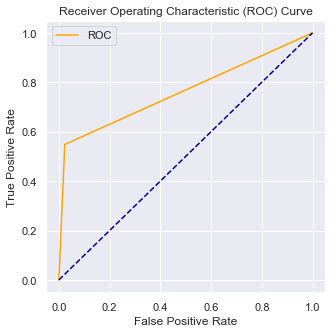

In [488]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(5,5))
plot_roc_curve(fpr, tpr)


Making predictions.

In [434]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier()
classifier.fit(Xtr,Ytrain)
prediction1 = classifier.predict(Xte)

In [436]:
df_pred.to_csv('C:\\Users\\sneha\\Downloads\\Homeworks\\DSF\\prediction_final.csv', index=False)

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/snehageetharsg

Highest Rank: 5715

Score: 0.5714

Number of entries: 2

INCLUDE IMAGE OF YOUR KAGGLE RANKING!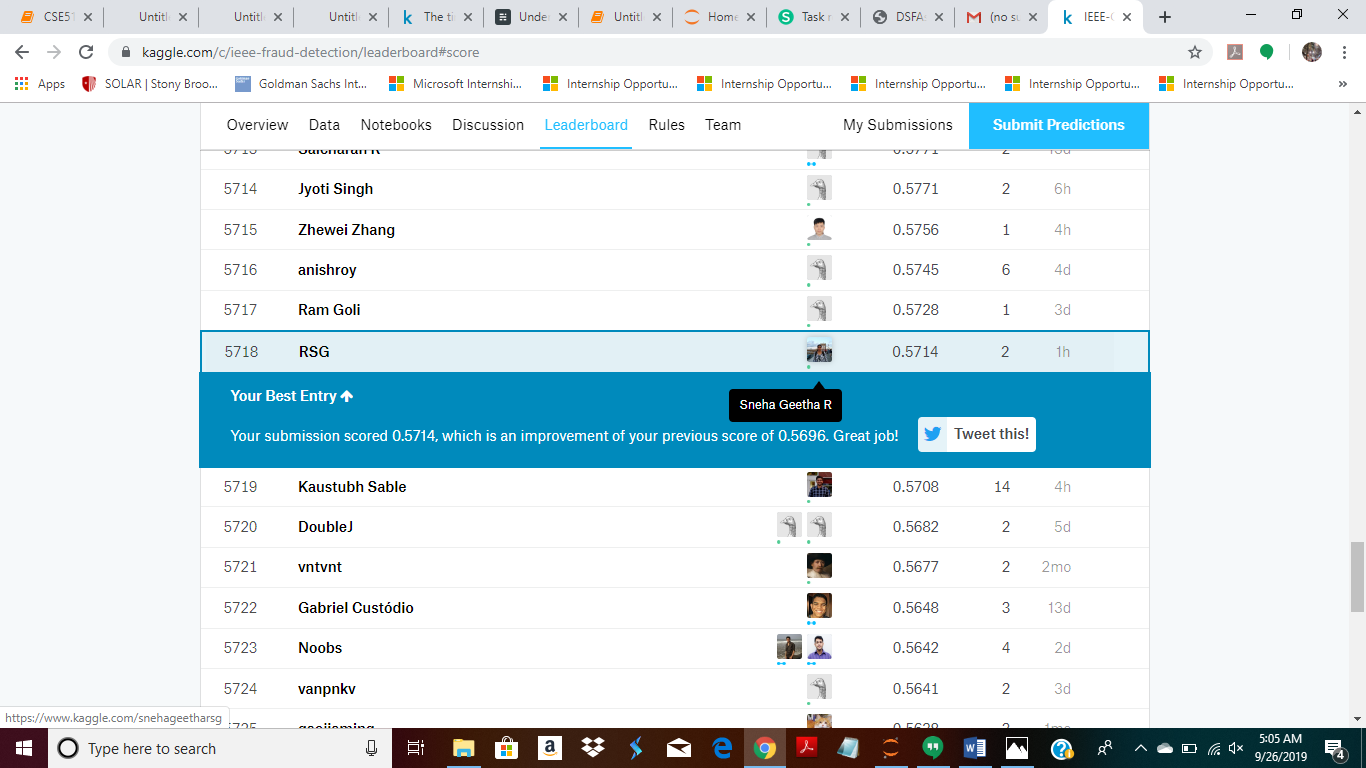